# Stroke Length of Stay vs Length of Data Collection
- Data Visualization

In [3]:
# import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import re
import copy
%matplotlib inline

In [ ]:
los_list = []
lodata_list = []
# make dataframe
df = pd.DataFrame

In [8]:
list1 = range(100)
list2 = range(100)
compare = pd.DataFrame(
    {'length_of_stay': list1,
     'length_of_data_collection': list2
    })

In [9]:
compare.head()

,length_of_data_collection,length_of_stay
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4


# Fake data

In [16]:
np.random.randint(0,50,size=(100, 2))

array([[ 0,  2],
       [ 4, 22],
       [42, 20],
       [10, 47],
       [22, 10],
       [35, 21],
       [21, 37],
       [16,  8],
       [49,  1],
       [10, 46],
       [34, 25],
       [44, 43],
       [38, 16],
       [23,  6],
       [28, 47],
       [10, 32],
       [44,  3],
       [47, 24],
       [12, 33],
       [36, 32],
       [39,  4],
       [24, 13],
       [40, 22],
       [21, 13],
       [24, 40],
       [41, 36],
       [43, 35],
       [23, 49],
       [34, 20],
       [21, 32],
       [20, 16],
       [ 2, 11],
       [22, 31],
       [25, 29],
       [41, 44],
       [34, 28],
       [28, 18],
       [45, 49],
       [38, 21],
       [ 9, 32],
       [39, 34],
       [ 5, 42],
       [24, 29],
       [42, 33],
       [16, 45],
       [48, 17],
       [37,  4],
       [10, 43],
       [49, 13],
       [34, 27],
       [38, 33],
       [24, 25],
       [10, 28],
       [ 2, 30],
       [42,  8],
       [ 8, 10],
       [46,  3],
       [25,  1],
       [19, 26

In [20]:
np.random.seed(42)
example = pd.DataFrame(np.random.randint(0,50,size=(100, 2)), columns=['first','second'])

In [30]:
type(example.iloc[:,0])

pandas.core.series.Series

# Real Data

In [158]:
# Length of Stay (LOS)
los = pd.read_csv('Documents/GitHub/LOS.csv', header=None)

In [159]:
len(los)

34

In [160]:
los.describe()

,0
count,34.000000
mean,24.941176
std,9.121872
min,9.000000
25%,18.250000
50%,24.000000
75%,32.000000
max,47.000000


# Line

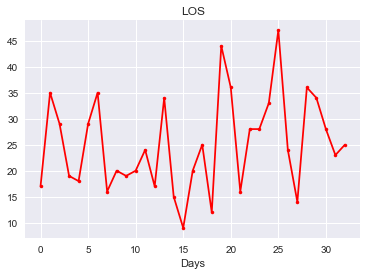

In [109]:
plt.title('LOS')
plt.xlabel('Days')
# plt.plot(example.iloc[:,0], color='red')
plt.plot(los, color='red', marker='.')
# Display the plot
plt.show()

# Plot univariate distributions
- histogram with fitted kernel density estimate (KDE)

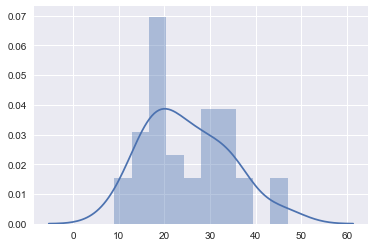

In [189]:
# x = np.random.normal(size=100)
sns.distplot(los, bins=10);

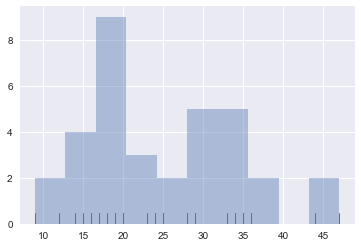

In [190]:
# Histogram with rug plot (tick for every observation)
sns.distplot(los, bins=10, kde=False, rug=True)

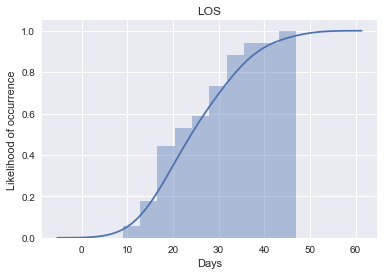

In [191]:
sns.distplot(los, bins=10,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
plt.title('LOS')
# plt.legend(loc='lower right')
plt.xlabel('Days')
plt.ylabel('Likelihood of occurrence')
plt.show()

# KDE

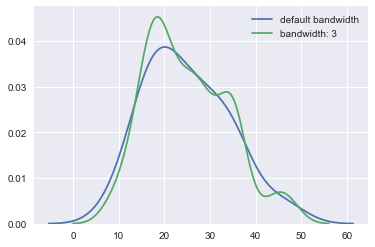

In [176]:
sns.kdeplot(los.iloc[:,0].values, label='default bandwidth', legend=True)
sns.kdeplot(los.iloc[:,0].values, bw=3, label="bandwidth: 3")
plt.show()

### Example - KDE with bandwidths

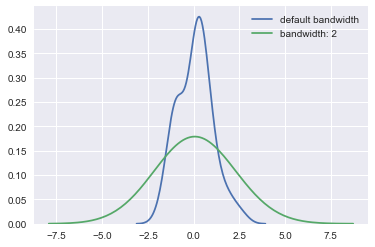

In [128]:
# KDE with various bandwidths
sns.kdeplot(x, label='default bandwidth', legend=True)
sns.kdeplot(x, bw=2, label="bandwidth: 2")
# plt.legend();

# Histogram

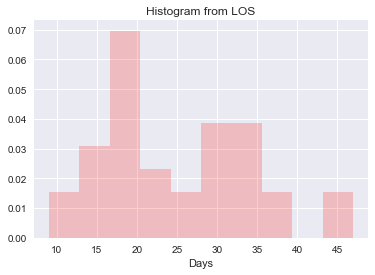

In [184]:
# 1 histogram
plt.title('Histogram from LOS')
plt.xlabel('Days')
plt.hist(los.iloc[:,0], bins=10, normed=True, color='red', alpha=0.2)
# plt.hist(example.iloc[:,0], bins=30, normed=True, color='red', alpha=0.2)
# Display the plot
plt.show()

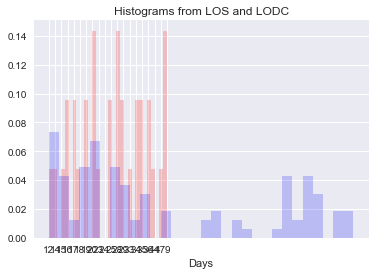

In [86]:
# Overlaid 2 histograms
plt.title('Histograms from LOS and LODC')
plt.xlabel('Days')
plt.hist(los, bins=30, normed=True, color='red', alpha=0.2)
plt.hist(example.iloc[:,1], bins=30, normed=True, color='blue', alpha=0.2)

# Display the plot
plt.show()

# ECDF

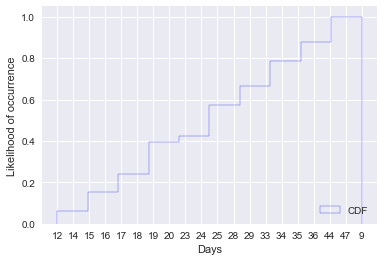

In [104]:
plt.hist(los, # bins=64, range=(0,256),
               normed=True, cumulative=True,
               label='CDF', histtype='step',
               color='blue')#, alpha=1.0)

# tidy up the figure
plt.grid(True)
plt.legend(loc='lower right')
plt.xlabel('Days')
plt.ylabel('Likelihood of occurrence')

plt.show()

In [31]:
# write a function to compute the ECDF
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

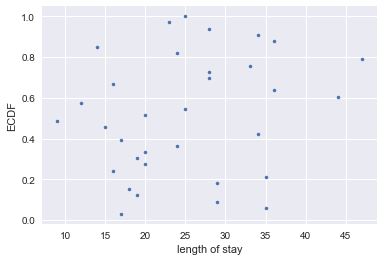

In [101]:
x_los, y_los = ecdf(los)
# Generate plot
_ = plt.plot(x_los, y_los, marker='.', linestyle='none')

# Label the axes
_ = plt.xlabel('length of stay')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

## examples

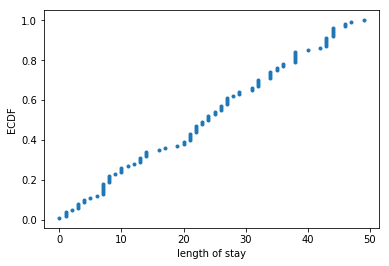

In [32]:
# matplotlib example ECDF

# Compute ECDF for versicolor data
x_los, y_los = ecdf(example.iloc[:,0])

# Generate plot
_ = plt.plot(x_los, y_los, marker='.', linestyle='none')

# Label the axes
_ = plt.xlabel('length of stay')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

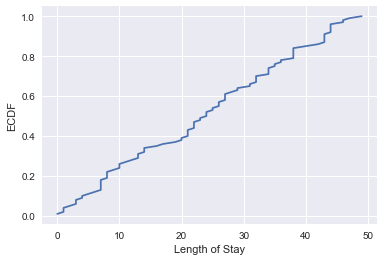

In [56]:
# seaborn example ECDF
x_los, y_los = ecdf(example.iloc[:,0])
sns.set()
_ = plt.plot(x_los, y_los)
# _ = plt.plot(x, y, marker='.',linestyle='none')
_ = plt.xlabel('Length of Stay')
_ = plt.ylabel('ECDF')
plt.show()

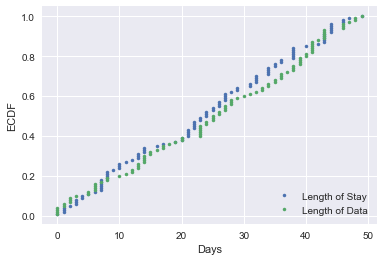

In [57]:
# Compare multiple ECDFs in 1 plot

# Compute ECDFs
x_los, y_los = ecdf(example.iloc[:,0])
x_lodc, y_lodc = ecdf(example.iloc[:,1])

# Plot all ECDFs on the same plot
plt.plot(x_los, y_los, marker='.', linestyle='none')
plt.plot(x_lodc, y_lodc, marker='.', linestyle='none')

# Annotate the plot
plt.legend(('Length of Stay', 'Length of Data'), loc = 'lower right')
_ = plt.xlabel('Days')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

# Overlay CDF on Histogram

In [ ]:
# Load the image into an array: image
image = plt.imread('640px-Unequalized_Hawkes_Bay_NZ.jpg')

# Display image in top subplot using color map 'gray'
plt.subplot(2,1,1)
plt.imshow(image, cmap='gray')
plt.title('Original image')
plt.axis('off')

# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Display a histogram of the pixels in the bottom subplot
plt.subplot(2,1,2)
pdf = plt.hist(pixels, bins=64, range=(0,256), normed=False, 
               color='red', alpha=0.4)
plt.grid('off')

# Use plt.twinx() to overlay the CDF in the bottom subplot
plt.twinx()

# Display a cumulative histogram of the pixels
cdf = plt.hist(pixels, bins=64, range=(0,256),
               normed=True, cumulative=True,
               color='blue', alpha=0.4)
               
# Specify x-axis range, hide axes, add title and display plot
plt.xlim((0,256))
plt.grid('off')
plt.title('PDF & CDF (original image)')
plt.show()